<a href="https://colab.research.google.com/github/AdityaK-github/dai-assignment-3/blob/main/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
np.random.seed(42)
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Label'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [58]:
print("Step 1: Iris Dataset First 5 Rows")
print(data.head())

Step 1: Iris Dataset First 5 Rows
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    Label  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [59]:
print("\nStep 2: Dataset Description")
print(data.describe())


Step 2: Dataset Description
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [60]:
print("\nStep 3: Class Distribution")
label_counts = data['Label'].value_counts()
print("Number of samples per class:")
print(label_counts)


Step 3: Class Distribution
Number of samples per class:
Label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [61]:
X = data.drop(columns=['Label'])
y = data['Label']

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("\nStep 4: Data Preparation")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Step 4: Data Preparation
Training set size: 105 samples
Testing set size: 45 samples


In [64]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [65]:
print("\nStep 5: Model Evaluation (No Dimensionality Reduction)")
original_results = {}


Step 5: Model Evaluation (No Dimensionality Reduction)


In [66]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    original_results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.9111
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Decision Tree Results:
Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0

In [67]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [68]:
print("\nStep 6: PCA Dimensionality Reduction")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")


Step 6: PCA Dimensionality Reduction
Explained variance ratio: [0.7184292  0.24178316]
Total explained variance: 0.9602


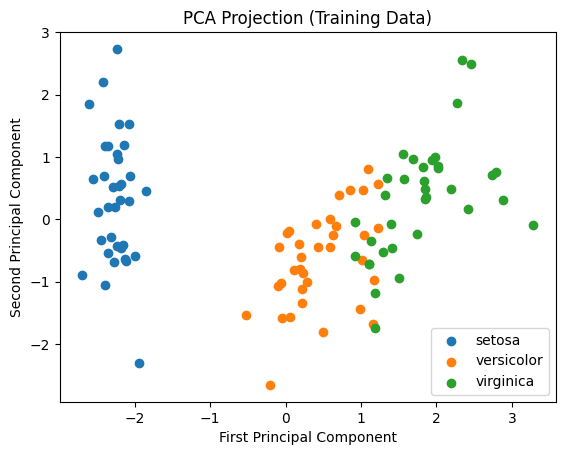

In [69]:
for target, target_name in enumerate(iris.target_names):
    mask = y_train == target_name
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=target_name)
plt.title("PCA Projection (Training Data)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

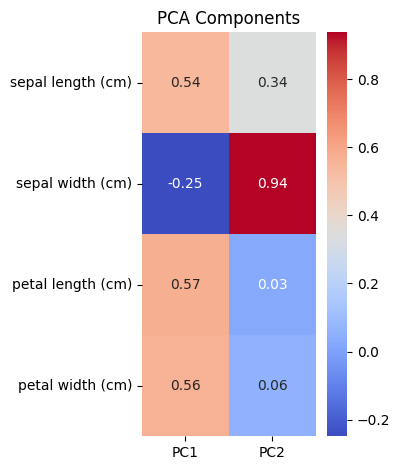

In [70]:
plt.subplot(1, 2, 2)
components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
sns.heatmap(components, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("PCA Components")
plt.tight_layout()
plt.show()

In [71]:
print("\nStep 8: Model Evaluation with PCA")
pca_results = {}


Step 8: Model Evaluation with PCA


In [72]:
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    pca_results[name] = accuracy

    print(f"\n{name} Results (with PCA):")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Results (with PCA):
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Decision Tree Results (with PCA):
Accuracy: 0.8444
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.72      0.87      0.79        15
   virginica       0.83      0.67      0.74        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

Confusion Matrix:
[[15  0  

In [73]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print("\nStep 9: LDA Dimensionality Reduction")
print(f"Explained variance ratio: {lda.explained_variance_ratio_}")


Step 9: LDA Dimensionality Reduction
Explained variance ratio: [0.9881565 0.0118435]


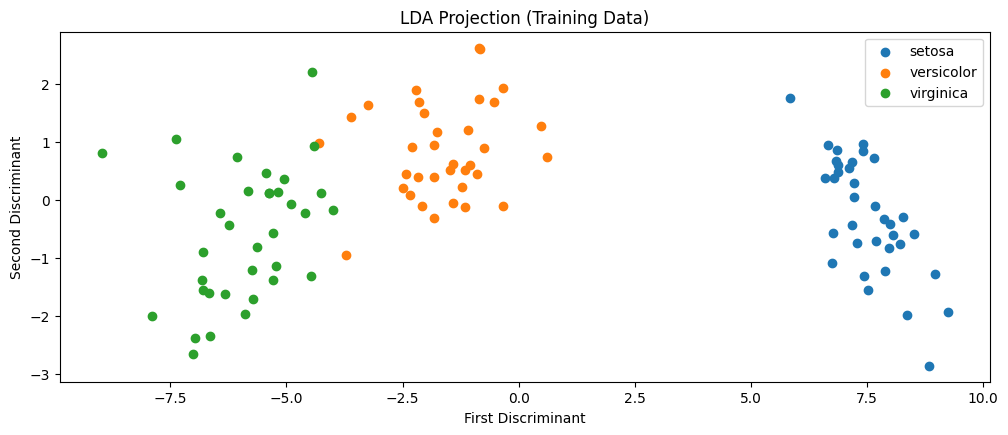

In [74]:
plt.figure(figsize=(12, 10))

# Subplot 1: Scatter plot of LDA components
plt.subplot(2, 1, 1)
for target, target_name in enumerate(iris.target_names):
    mask = y_train == target_name
    plt.scatter(X_train_lda[mask, 0], X_train_lda[mask, 1], label=target_name)
plt.title("LDA Projection (Training Data)")
plt.xlabel("First Discriminant")
plt.ylabel("Second Discriminant")
plt.legend()



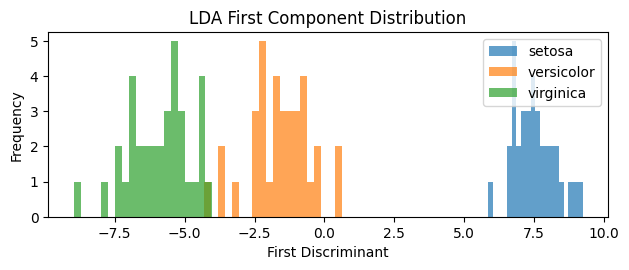


Step 11: Model Evaluation with LDA


In [75]:
# Subplot 2: Histogram of first LDA component
plt.subplot(2, 1, 2)
for target, target_name in enumerate(iris.target_names):
    mask = y_train == target_name
    plt.hist(X_train_lda[mask, 0], bins=20, alpha=0.7, label=target_name)
plt.title("LDA First Component Distribution")
plt.xlabel("First Discriminant")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Step 11: Model Evaluation with LDA
print("\nStep 11: Model Evaluation with LDA")
lda_results = {}



In [76]:
for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)

    accuracy = accuracy_score(y_test, y_pred)
    lda_results[name] = accuracy

    print(f"\n{name} Results (with LDA):")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Step 12: Feature Importance in LDA
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'LDA1 Coefficient': lda.scalings_[:, 0],
    'LDA2 Coefficient': lda.scalings_[:, 1]
})
feature_importance = feature_importance.sort_values(by='LDA1 Coefficient', key=abs, ascending=False)

print("\nStep 12: Feature Contributions to LDA Components:")
print(feature_importance)




Logistic Regression Results (with LDA):
Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Decision Tree Results (with LDA):
Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  

In [77]:
# Step 13: Compare All Methods
print("\nStep 13: Comparison of All Methods (Accuracy)")
comparison = pd.DataFrame({
    'Original': original_results,
    'PCA': pca_results,
    'LDA': lda_results
}).T

print(comparison)




Step 13: Comparison of All Methods (Accuracy)
          Logistic Regression  Decision Tree  Random Forest       SVM
Original             0.911111       0.933333       0.888889  0.911111
PCA                  0.888889       0.844444       0.888889  0.911111
LDA                  0.977778       0.977778       0.977778  0.977778


<Figure size 1200x800 with 0 Axes>

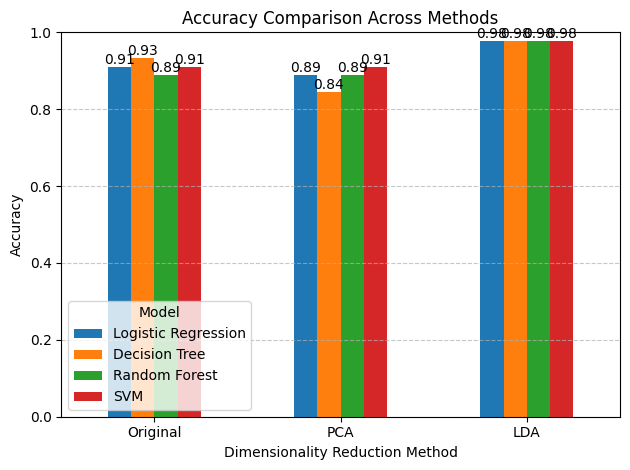

In [78]:
# Visualize the comparison
plt.figure(figsize=(12, 8))
comparison.plot(kind='bar')
plt.title("Accuracy Comparison Across Methods")
plt.ylabel("Accuracy")
plt.xlabel("Dimensionality Reduction Method")
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Model")

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()